**Importing Libraries and Loading Dataset**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
!git clone https://github.com/MIT-Robotics-Association/Computer-Vision-Sessions

Cloning into 'Computer-Vision-Sessions'...
remote: Enumerating objects: 1322, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 1322 (delta 9), reused 10 (delta 0), pack-reused 1291
Receiving objects: 100% (1322/1322), 90.77 MiB | 19.38 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (1295/1295), done.


__Image Histogram__

In [ ]:
img = cv2.imread(r"/content/Computer-Vision-Sessions/data/lena.png")

Text(0.5, 1.0, 'Red Channel')

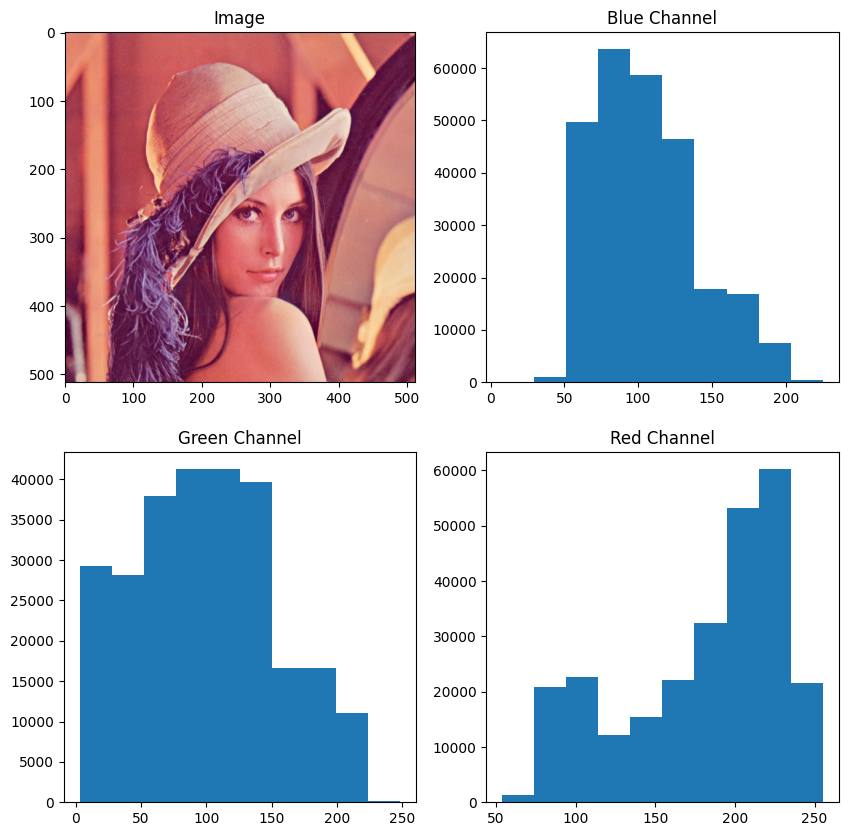

In [ ]:
f, ax = plt.subplots(2,2,figsize=(10, 10))
ax[0,0].imshow(img[:,:,::-1])
ax[0,1].hist(np.ravel(img[:,:,0]))
ax[1,0].hist(np.ravel(img[:,:,1]))
ax[1,1].hist(np.ravel(img[:,:,2]))
ax[0,0].set_title("Image")
ax[0,1].set_title("Blue Channel")
ax[1,0].set_title("Green Channel")
ax[1,1].set_title("Red Channel")

__Global Thresholding__

In [ ]:
img = cv2.imread(r"/content/Computer-Vision-Sessions/data/boat.jpg")

In [ ]:
img.shape

(514, 768, 3)

In [ ]:
img = img[:,:,0]

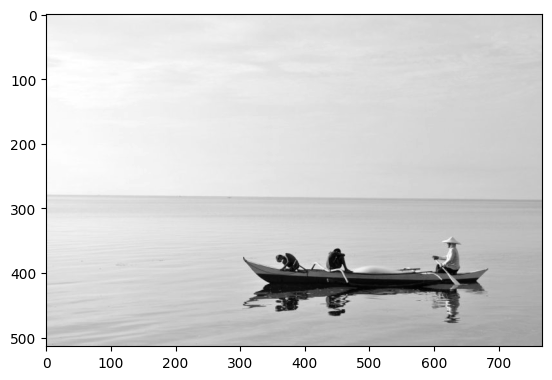

In [ ]:
plt.imshow(img, cmap = 'gray')

(array([  6758.,   2265.,   3485.,   2968.,   1479.,    981.,  20313.,
         77390., 175068., 104045.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

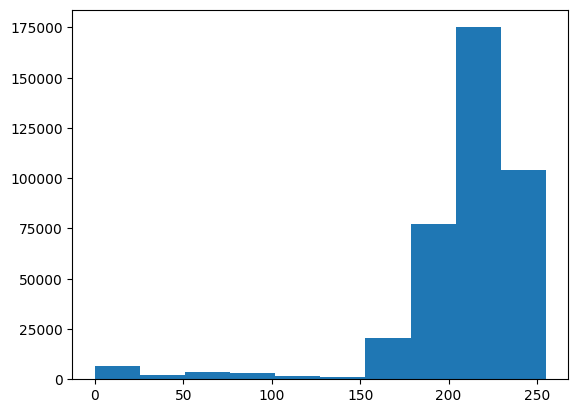

In [ ]:
plt.hist(np.ravel(img))

In [ ]:
mask = img < 50

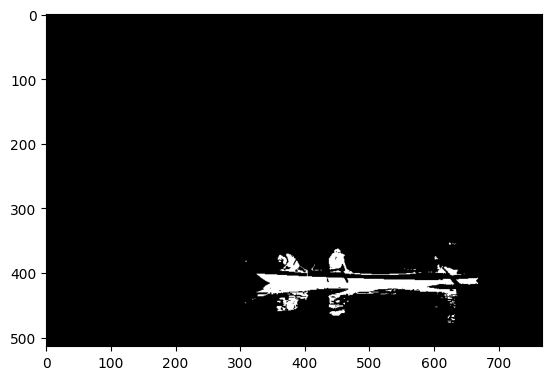

In [ ]:
plt.imshow(mask, cmap = 'gray');

In [ ]:
img_thresh = mask*img

(array([386212.,   1440.,   2072.,   1890.,    800.,    593.,    506.,
           446.,    400.,    393.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

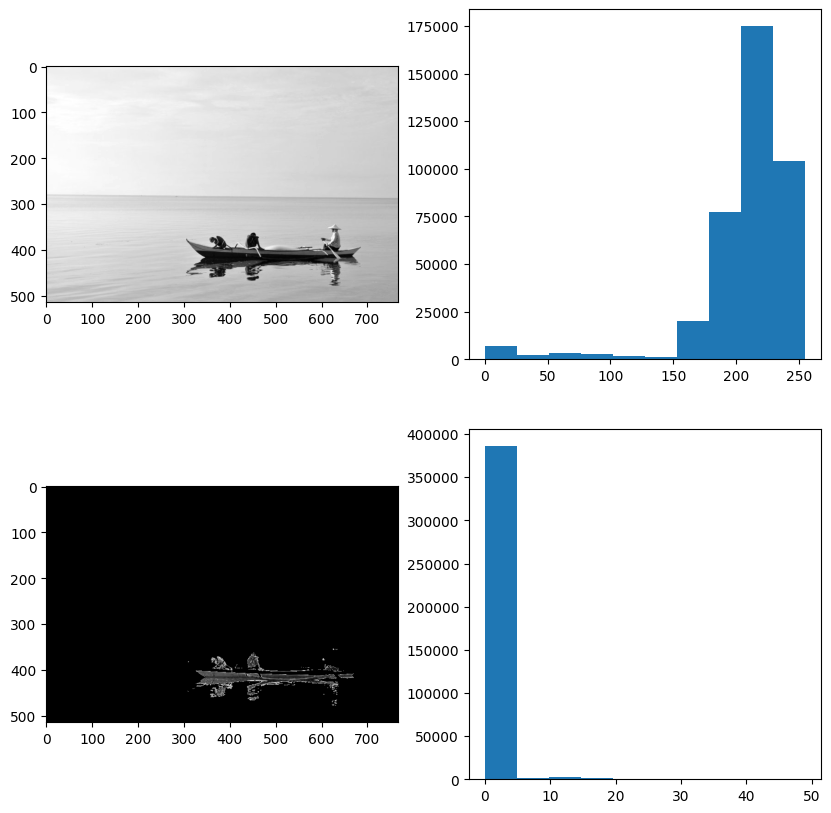

In [ ]:
f, ax = plt.subplots(2,2,figsize=(10, 10))
ax[0,0].imshow(img, cmap = 'gray')
ax[0,1].hist(np.ravel(img))
ax[1,0].imshow(img_thresh, cmap = 'gray')
ax[1,1].hist(np.ravel(img_thresh))

In [ ]:
img = cv2.imread(r"/content/Computer-Vision-Sessions/data/thresh.png")

In [ ]:
img = img[:,:,0]

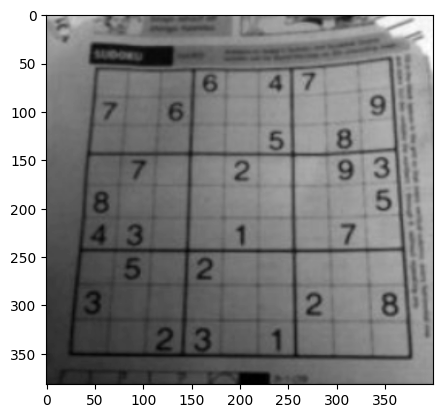

In [ ]:
plt.imshow(img, cmap = 'gray')

(array([ 2152.,  7702., 19438., 28004., 36351., 36054., 21072.,   682.,
          234.,  1111.]),
 array([  0. ,  25.2,  50.4,  75.6, 100.8, 126. , 151.2, 176.4, 201.6,
        226.8, 252. ]),
 <BarContainer object of 10 artists>)

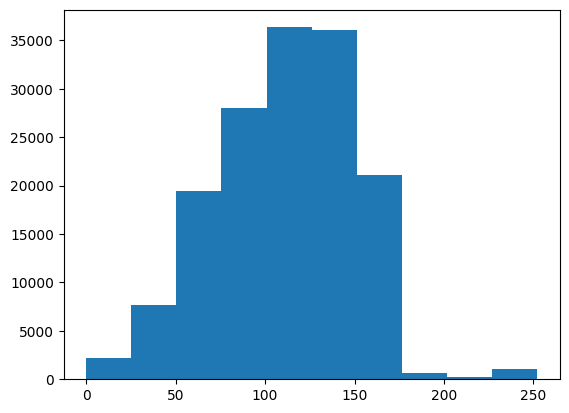

In [ ]:
plt.hist(np.ravel(img))

In [ ]:
mask = img < 50

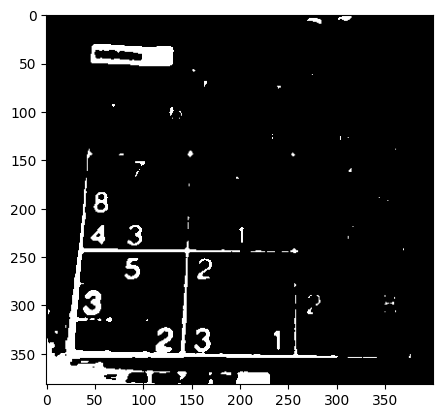

In [ ]:
plt.imshow(mask, cmap = 'gray');

In [ ]:
img_thresh = mask*img

(array([1.43722e+05, 1.34000e+02, 5.32000e+02, 4.83000e+02, 5.86000e+02,
        7.99000e+02, 1.09900e+03, 1.34900e+03, 1.68100e+03, 2.41500e+03]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

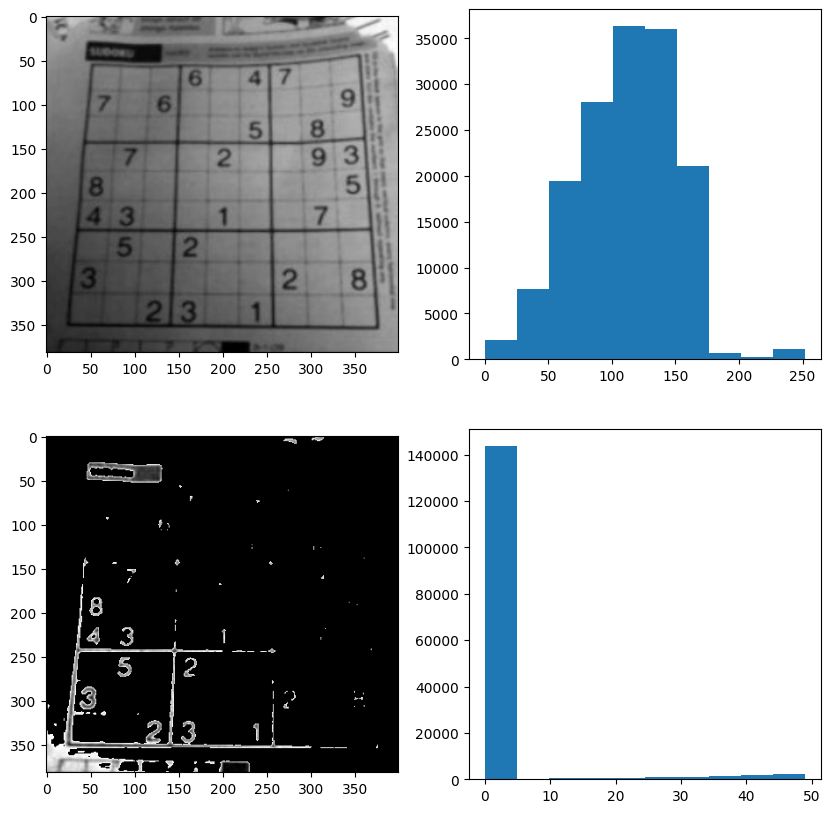

In [ ]:
f, ax = plt.subplots(2,2,figsize=(10, 10))
ax[0,0].imshow(img, cmap = 'gray')
ax[0,1].hist(np.ravel(img))
ax[1,0].imshow(img_thresh, cmap = 'gray')
ax[1,1].hist(np.ravel(img_thresh))

__Adaptive Thresholding__

In [ ]:
mask = cv2.adaptiveThreshold(img, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15 ,10)

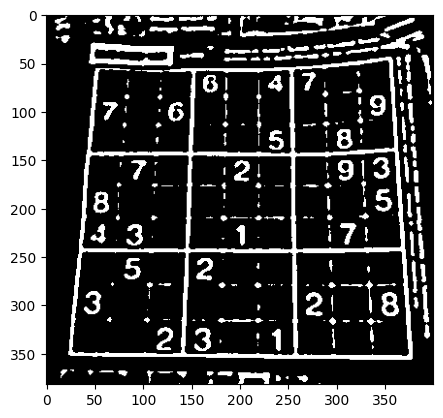

In [ ]:
plt.imshow(mask, cmap = 'gray');

In [ ]:
img_thresh = img*mask

(array([128329.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24471.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

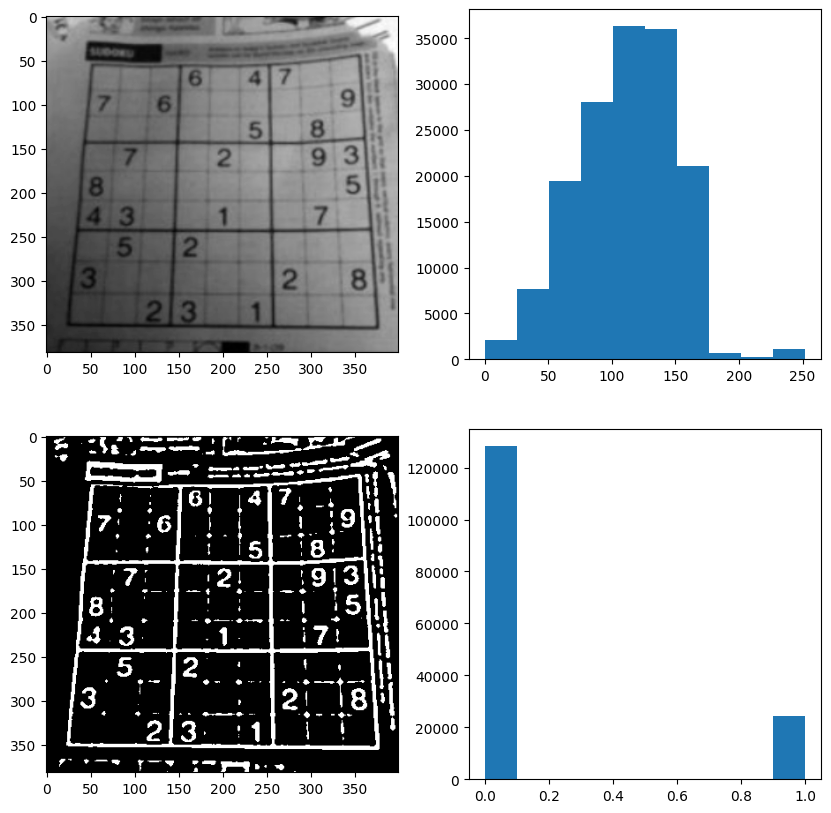

In [ ]:
f, ax = plt.subplots(2,2,figsize=(10, 10))
ax[0,0].imshow(img, cmap = 'gray')
ax[0,1].hist(np.ravel(img))
ax[1,0].imshow(mask, cmap = 'gray')
ax[1,1].hist(np.ravel(mask))

**Canny Edge Detection**

```
# This is formatted as code
```



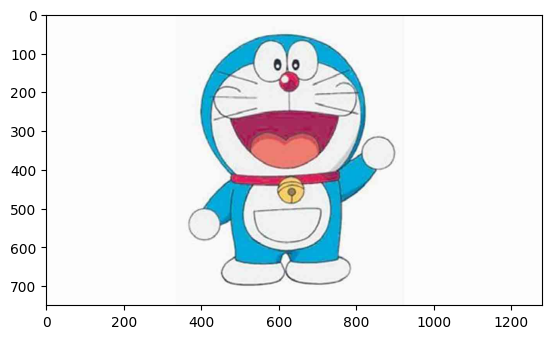

In [ ]:
img = cv2.imread("/content/Computer-Vision-Sessions/data/doraemon.jpg")
plt.imshow(img[:,:,::-1])

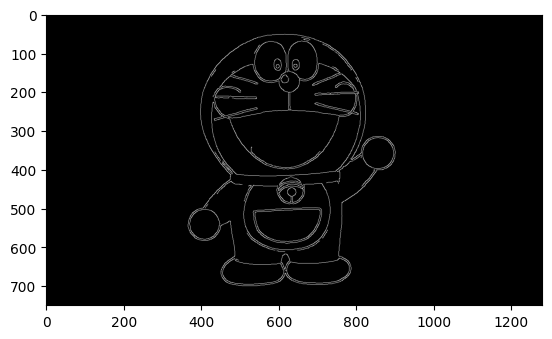

In [ ]:
# Convert to Grayscale
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur Image
blurImg = cv2.GaussianBlur(grayImg, (3, 3), 0)
# Canny
cannyImg = cv2.Canny(blurImg, 100, 200)

plt.imshow(cannyImg, cmap='gray')

**Contour Detection**

1 objects were found in this image.


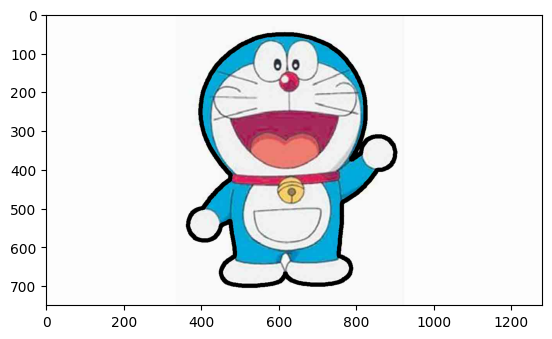

In [ ]:
# find the contours
contours, _ = cv2.findContours(cannyImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgCopy = img.copy()
# draw the contours
cv2.drawContours(imgCopy, contours, -1, (0, 0, 0), 10)
print(len(contours), "objects were found in this image.")
plt.imshow(imgCopy[:,:,::-1])